## Please, fill in before you start:

First Name: Sarah

Last Name: Hasan

Group:

### After the assigment is done, please, push it to a [private GitHub repository](https://docs.github.com/en/github/administering-a-repository/managing-repository-settings/setting-repository-visibility) and invite [SiLiKhon](https://github.com/SiLiKhon), [dMeVdok](https://github.com/dmevdok), [oleges1](https://github.com/oleges1) and [rogachevai](https://github.com/rogachevai) [as collaborators](https://docs.github.com/en/account-and-profile/setting-up-and-managing-your-github-user-account/managing-access-to-your-personal-repositories/inviting-collaborators-to-a-personal-repository).

Get the Titanic dataset:

In [1]:
!wget https://raw.githubusercontent.com/HSE-LAMBDA/MLDM-2021/main/01-intro/train.csv

--2021-09-26 17:47:07--  https://raw.githubusercontent.com/HSE-LAMBDA/MLDM-2021/main/01-intro/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60302 (59K) [text/plain]
Saving to: ‘train.csv’

train.csv           100%[===================>]  58.89K  --.-KB/s    in 0.001s  

2021-09-26 17:47:08 (106 MB/s) - ‘train.csv’ saved [60302/60302]



In [2]:
import pandas as pd
data = pd.read_csv("train.csv", index_col='PassengerId')
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### About the data
Here's some of the columns
* Name - a string with person's full name
* Survived - 1 if a person survived the shipwreck, 0 otherwise.
* Pclass - passenger class. Pclass == 3 is cheap'n'cheerful, Pclass == 1 is for moneybags.
* Sex - a person's gender
* Age - age in years, if available
* SibSp - number of siblings on a ship
* Parch - number of parents on a ship
* Fare - ticket cost
* Embarked - port where the passenger embarked
 * C = Cherbourg; Q = Queenstown; S = Southampton

## Task 1 (1 point)

In [42]:
# Compute survival rate for each of the three passenger classes (`Pclass` = 1, 2 and 3)
# (can you do it using groupby?)

import numpy as np 
data_after_grouping = data.groupby(['Pclass']).agg({'Survived': ['sum', 'count']   })
data_after_grouping.reset_index(inplace=True)
data_after_grouping.Survived['sum']/data_after_grouping.Survived['count'] *100 
Pclass=np.array(data_after_grouping.Pclass)
Rate=np.array(data_after_grouping.Survived['sum']/data_after_grouping.Survived['count'] *100 )
df_final = pd.DataFrame({'Pclass':Pclass, 'SurvivalRate':Rate})
df_final


,Pclass,SurvivalRate
0,1,62.962963
1,2,47.282609
2,3,24.236253


In [66]:
# And here is a more efficient way to calculate survival rate 

grouped_data = data.groupby('Pclass').Survived.sum() \
                        / data.groupby('Pclass').Survived.count()*100
grouped_data

Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64

## Task 2 (1 point)

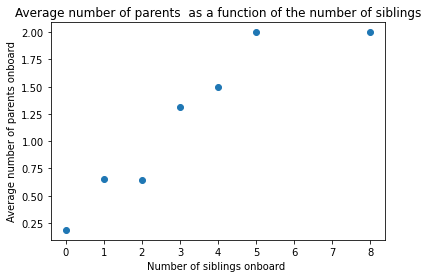

In [62]:
data2_after_grouping=data.groupby(['SibSp']).agg({'Parch': ['mean']   })
data2_after_grouping.reset_index(inplace=True)
# Plot the average number of parents onboard (`Parch`) as a function of the 
# number of siblings onboard (`SibSp`)

import matplotlib.pyplot as plt

data2_after_grouping=data.groupby(['SibSp']).agg({'Parch': ['mean']   })
data2_after_grouping.reset_index(inplace=True)
plt.scatter(data2_after_grouping.SibSp,data2_after_grouping.Parch)

plt.title('Average number of parents  as a function of the number of siblings')

plt.xlabel('Number of siblings onboard ')

plt.ylabel('Average number of parents onboard')

plt.show()


## Task 3 (2 points)

In [91]:
# Build a model with KNeighborsClassifier to get the accuracy of
# at least 0.75 on the validation part of the dataset

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

def feature_selection_and_preprocessing(dataset):
  # <YOUR CODE>
  # preprocessing
  dataset['Age'] = dataset['Age'].fillna(0)
  gender_mapping = {
           'male': 1,
           'female': 0}
  dataset['Sex'] = dataset['Sex'].map(gender_mapping)
   
  dataset = dataset.fillna(dataset['Embarked']. value_counts(). index[0])  # filling nan with the most common value 
  Embarked_mapping = {
      'C':0,
      'Q':1,
      'S':2}
  dataset['Embarked'] = dataset['Embarked'].map(Embarked_mapping)

  #features
  features = dataset[["Fare", "Parch","Pclass","Age","Sex","Embarked"]].copy()
  features["Fare"] /= features["Fare"].mean()

  features['Fare'] *= 1
  return features

model = KNeighborsClassifier(
    # <YOUR CODE>
    # E.g.
    n_neighbors=1
)


# Validation code (do not touch)
data = pd.read_csv("train.csv", index_col='PassengerId')
data_train = data.iloc[:-100]
data_test = data.iloc[-100:]

model.fit(
    feature_selection_and_preprocessing(
        data_train.drop('Survived', axis=1)
    ),
    data_train['Survived']
)

test_predictions = model.predict(
    feature_selection_and_preprocessing(
        data_test.drop('Survived', axis=1)
    )
)
print("Test accuracy:", accuracy_score(
    data_test['Survived'],
    test_predictions
))

Test accuracy: 0.75


## Task 4 (2 points)

Check how your model from the previous task performs on randomized splits to train / test (with test set of size 100). Plot the histogram of the test error distribution.

*Hint: check sklearn's `sklearn.model_selection.train_test_split` function.*

In [134]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


def feature_selection_and_preprocessing(dataset):
  # <YOUR CODE>
  # preprocessing
  dataset['Age'] = dataset['Age'].fillna(0)
  gender_mapping = {
           'male': 1,
           'female': 0}
  dataset['Sex'] = dataset['Sex'].map(gender_mapping)
   
  dataset = dataset.fillna(dataset['Embarked']. value_counts(). index[0])  # filling nan with the most common value 
  Embarked_mapping = {
      'C':0,
      'Q':1,
      'S':2}
  dataset['Embarked'] = dataset['Embarked'].map(Embarked_mapping)

  #features
  features = dataset[["Fare", "Parch","Pclass","Age","Sex","Embarked"]].copy()
  features["Fare"] /= features["Fare"].mean()

  features['Fare'] *= 1
  return features

model = KNeighborsClassifier(
    # <YOUR CODE>
    # E.g.
    n_neighbors=1
)


# Validation code (do not touch)
data = pd.read_csv("train.csv", index_col='PassengerId')


x_train, x_test, y_train, y_test = train_test_split(data.drop('Survived', axis=1), data["Survived"], test_size=100, shuffle=True )

model.fit(
    feature_selection_and_preprocessing(
        x_train
    ),
    y_train
)

test_predictions = model.predict(
    feature_selection_and_preprocessing(
        x_test
    )
)
print("Test accuracy:", accuracy_score(
     y_test,
    test_predictions
))

Test accuracy: 0.72
